[![Banner-Introducci-n.png](https://i.postimg.cc/VkCcqsvv/Banner-Introducci-n.png)](https://postimg.cc/4YsMZgzR)

# Introducción a ciencia de datos
## L1: Actividad sobre el t-test

De acuerdo con nuestro caso de proyecto de Airbnb, queremos inferir o comprobar si la hipótesis de diferencias de precios entre habitaciones de 2 cuartos en la zona central oeste y central norte son significativas. 

### Objetivos
1. Aplicar la validación de hipótesis con intervalos de confianza
2. Aplicar un t-test para la comparación de muestras


### 1. Contexto del caso

Esta actividad te permitirá desarrollar una comprensión más profunda de los temas vistos, entre ellos: 

· Valor T 
· Prueba T 
· Valor p 
· Contraste de hipótesis 

Para lograr extender lo aprendido se requieres descargar los datos de listings.csv disponibles en el curso. Los datos han sido analizados, depurados y agregados cuando fue apropiado para facilitar la discusión pública. 

### 2. Preguntas de extensión 

Utiliza los datos de listings_m y con las columnas de neighbourhood_cleansed(barrios) y price e identifica los diferentes barrios mencionados y sus respectivos precios 

1. Calcula los promedios de precio de todos los barrios y grafica los resultados 

2. Realiza una prueba T y obten los valores de T y p, para dos barrios centrales (Centrum-Oost y Centrum-West) 

3. Identifica la hipótesis a contrastar para validar si los precios entre estos barrios son iguales con la prueba t. 

4. Evalúa la hipótesis con niveles de significancia del 1%, 5%, 10% 

### 2. Importación de librerías y archivos
En las siguientes líneas de código se importaran los materiales de trabajo necesarios para desarrollar el caso de uso, en esto se incluyen las *librerías y los datos*

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para comando de sistema
import os
# Librería para manejo de datos
import pandas as pd
#librería para cálculos numéricos
import numpy as np
# Calcular el test estadístico
from statsmodels.stats import weightstats as stests
#librería para graficar
import matplotlib.pyplot as plt

In [2]:
# cargar los datos en csv
data= pd.read_csv('listings_m.csv', sep=';',encoding='latin-1')

C:\Users\Edwar\AppData\Local\Temp\ipykernel_9728\123426726.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('listings_m.csv', sep=';',encoding='latin-1')


In [3]:
#visualizar los primeros registros
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,"2,02104E+13",12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,"2,02104E+13",12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,"2,02104E+13",11/04/2021,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,"2,02104E+13",11/04/2021,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,"2,02104E+13",13/04/2021,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


<AxesSubplot:xlabel='host_neighbourhood'>

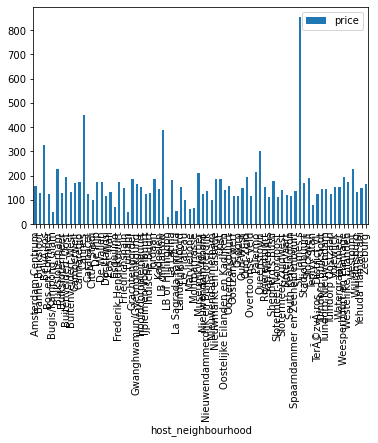

In [4]:
# Elegir las zonas
data_precio=data.groupby('host_neighbourhood').mean().reset_index()[['host_neighbourhood','price']]
#graficar los vecindarios por promedios
data_precio.plot.bar(x='host_neighbourhood', y='price')

* H0 : El promedio de los dos grupos son iguales
* H1 : El promedio de los dos grupos **NO son iguales**

In [5]:
data_precio

,host_neighbourhood,price
0,Amsterdam Centrum,155.648069
1,Banne Buiksloot,127.347222
2,BelvÃ¡ros,324.000000
3,Bos en Lommer,123.747604
4,Bugis/Kampong Glam,50.000000
...,...,...
71,Westelijke Eilanden,172.205674
72,Westpunt,227.000000
73,Williamsburg,130.000000
74,Yehuda Hamaccabi,149.000000


In [6]:
# Mostrar promedio de precios de bookings
Precio_C0=data[data['host_neighbourhood']=='Amsterdam Centrum']['price']
Precio_CW=data[data['host_neighbourhood']=='Zeeburg']['price']
print('Promedio CO: '+str(Precio_C0.mean()))
print('Promedio CW: '+str(Precio_CW.mean()))

Promedio CO: 155.6480686695279
Promedio CW: 166.63793103448276


In [7]:
# Valores de z y p
ztest ,pval1 = stests.ztest(Precio_C0, x2=Precio_CW, value=0,alternative='two-sided')
print('Valor de z: '+str(ztest))
print('Valor p: '+ str(pval1))

Valor de z: -1.0143365518224394
Valor p: 0.3104221883695887


In [8]:
# Regla de decisión si el p valor es menor que la significancia escogida 
confianza=0.95
significancia=1-confianza
# Si se tiene menor valor se rechaza la hipótesis nula
if pval1<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

No rechazar hipótesis nula


Por lo tanto podemos inferir con un nivel de confianza del ...% que los promedios del valor de habitacion entre estas dos zonas para apartamentos de dos alcobas ES ...